In [2]:
import numpy as np
def findMinWithRange(xdata,Idata,error):  

  minimum = np.argmin(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]<Idata[minimum]+error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i

  minimumIndex = np.array([minimumsx,minimumdx])
  
  return minimumIndex

def findMaxWithRange(xdata,Idata,error):  

  minimum = np.argmax(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]>Idata[minimum]-error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i

  minimumIndex = np.array([minimumsx,minimumdx])
  
  return minimumIndex

Index rifr from fit
1.4803990617051743
0.018870258108030183
Index rifr err graficamente
0.042
Brewster Angle from fit
55.961227989254084
0.7539907185818694
Index I0 from fit
474.42817081400386
9.835717807085512
I0 err graficamente
36
Index rifr from fit parallel
1.4199333465422272
0.05797031709983452
Index rifr err graficamente parallel
0.05797031709983452
Brewster Angle from fit parallel
54.844556262013164
1.1012010856404555
Index I0 from fit parallel
669.8799422412142
108.33876702771312
I0 err graficamente parallel
108.33876702771312


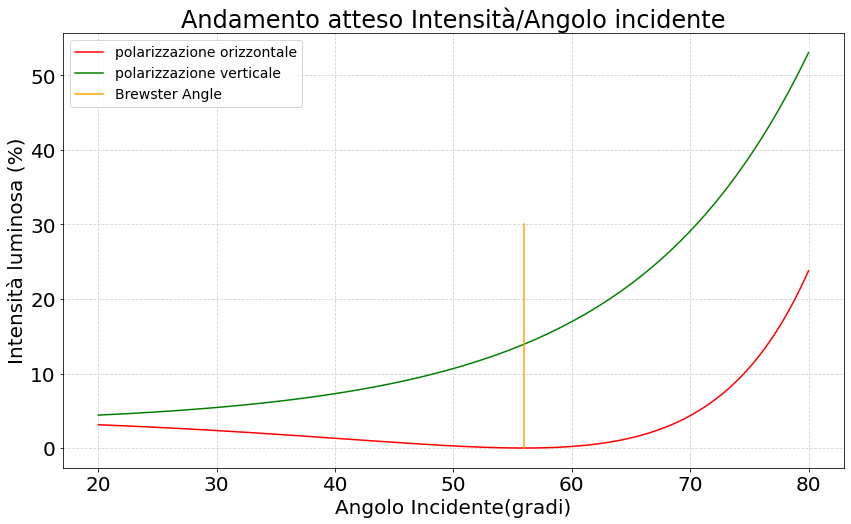

Brewster Angle data range from minimum dati grezzi
52.0
58.0
Brewster Angle Simulated data mean from minimum dati grezzi
55.0
Brewster Angle Simulated data error from minimum dati grezzi
3.0000000000000013
Refraction Index from minimum dati grezzi
1.4281480067421144
Refraction Index error from minimum dati grezzi
0.15915343616892985


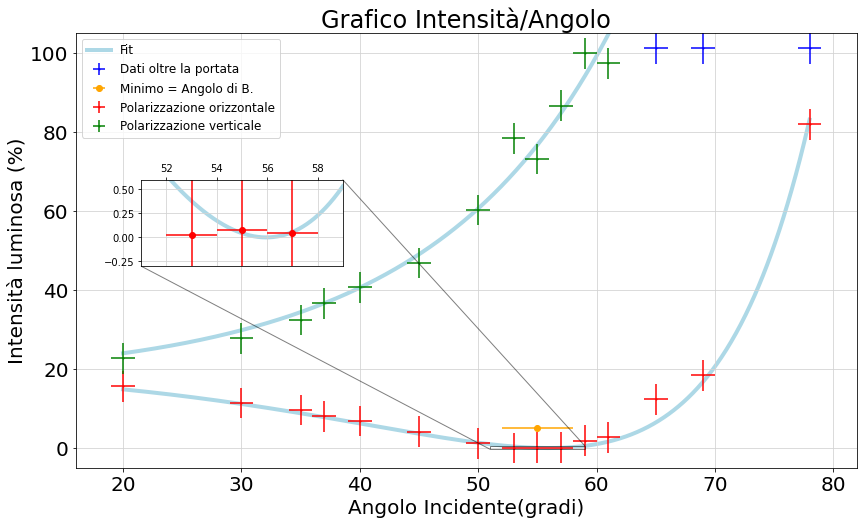

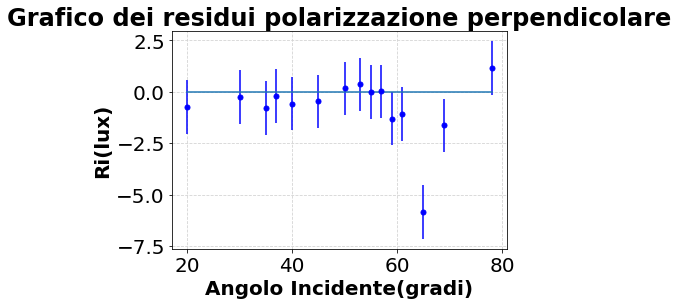

sigma_post_fit
1.7572671377749913
t sigma dalla media polarizzazione perpendicolare
[0.65360745 0.93522776 0.61416366 0.08825995 0.27153584 0.33415585
 0.11668672 0.45296171 0.01661978 0.20266331 0.00634241 0.74406959
 0.429934   0.14277367 3.33297488]
N*probabilità per la polarizzazione perpendicolare, se <0.5 si può rigettare
[2.75041135 2.19905196 2.82004636 3.39212619 3.28210824 3.22045212
 3.38225935 3.07333924 3.4048937  3.3361439  3.40529548 2.58191676
 3.10474071 3.37083223 0.0131806 ]


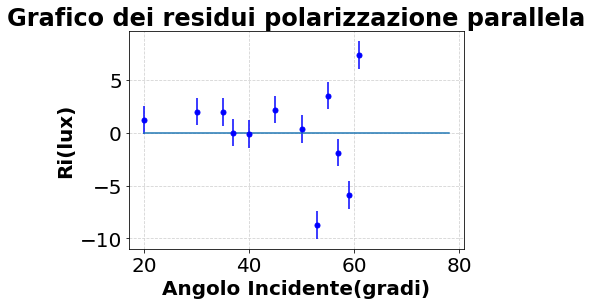

sigma_post_fit
4.219173666121422
t sigma dalla media polarizzazione parallela
[0.28887141 0.47401119 1.74516257 0.08727653 0.5200479  0.03230463
 0.00574019 0.4671664  0.8352441  2.07279801 0.44616973 1.3984615 ]
N*probabilità per la polarizzazione parallela, se <0.5 si può rigettare
[1.08828763 1.01408377 0.24746964 1.13034198 0.99114337 1.1340633
 1.13463651 1.01735548 0.80052499 0.13240141 1.02715732 0.42676641]


In [4]:
#ANALISI

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
#indice di rifrazione simulato

#Brewster angle simulato
theta = 56.34177390487406

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting1(thetai, indexrifr, I0):
  return I0*(np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fittingParallel(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting3(thetai, indexrifr, I0):
  return I0*(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fittingPerpendicular(thetai, indexrifr):
  return (np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

n = 1.4281480067421144

#input data
#Idata0 = Idata = np.array([0.9,0.5,0.1,0.5,3.8,30.5,2.1,3.5,4.1,6.9,8.4,0.,0.1])/100#dati ippolito
#Idata02 = Idata2 = np.array([10.6,16.8,30.1,42.8,67.2,101.1,14.4,14.1,10.3,13.9,12.8,5.9,11.1])/100#dati ippolito

#Idata1 = Idata = np.array([81.9,18.4,2.7,0.87,0.573,0.114,15.6,1.18,4.1,6.82])
Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,12.3,15.6,11.4])
Idata1 = Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,15.6,11.4,12.3])
#Idata12 = Idata2 = np.array([101.1,101.1,97.3,59.6,40.9,27.8,22.75,60.2,46.8,40.7])
Idata12 = Idata2 = np.array([101.1,101.1,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9,101.1,22.75,27.8])
#Idata1 = Idata = np.array([ 11.1, 9, 8.7, 5.2, 0.6, 0.5, 0.4, 0.1, 0, 0.1, 0.7, 5.1, 17.6, 83.7])#dati sabrina

Angle = np.array([12,21,29,40,49,60,70,40,45,50])
Angle = 90-np.array([12,21,29,40,45,50,53,55,35,37,33,31,70,60,25])
#Angle = np.array([8, 10, 20, 30, 40, 45, 50, 52, 55, 57, 60, 65, 70, 80])#angoli sabrina
#Angle0 = np.array([46.,51.,56.,61.,66.,76.,41.,36.,31.,26.,21.,58.5,53.5])#angoli ippolito
Angle = Angle/180*np.pi
Angle_err = 1
Idata_err = 0.8
Idata_err1 = 1.2

Idata_err = Idata_err1 = 1.3
#fitting

popt, pcov = scipy.optimize.curve_fit(fitting1, Angle, Idata1, p0 = np.array([n,500]), sigma=0.8*np.ones(len(Idata1)))
indexrifr_err,I0_err = np.sqrt(np.diag(pcov))
indexrifr,I0 = popt

#print fitting result
print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Index rifr err graficamente')
indexrifr_err = 0.014*3
print(indexrifr_err)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)
print('Index I0 from fit')
print(I0)
print(I0_err)
print('I0 err graficamente')
I0_err = 12*3
print(I0_err)
Angle1cut = (90-np.array([70,60,29,40,45,50,53,55,35,37,33,31]))
Idata2cut = np.array([22.75,27.8,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9])
#Angle1cut = (90-np.array([70,60,29,40,45,50,53,55,35,33]))
#Idata2cut = np.array([22.75,27.8,97.3,60.2,46.8,40.7,36.6,32.4,73.1,86.6])
#fitting dati paralleli
popt, pcov = scipy.optimize.curve_fit(fitting3, Angle1cut/180*np.pi,Idata2cut , p0 = np.array([n,I0]), sigma=1.3*np.ones(len(Idata2cut)))
indexrifr_err1,I0_err1 = np.sqrt(np.diag(pcov))
indexrifr1,I01 = popt

#print fitting result
print('Index rifr from fit parallel')
print(indexrifr1)
print(indexrifr_err1)
print('Index rifr err graficamente parallel')
indexrifr_err1 *= 1
print(indexrifr_err1)

print('Brewster Angle from fit parallel')
print(np.arctan(indexrifr1)*180/np.pi)
print(1/(1+indexrifr1**2)*indexrifr_err1*180/np.pi)
print('Index I0 from fit parallel')
print(I01)
print(I0_err1)
print('I0 err graficamente parallel')
I0_err1 *= 1
print(I0_err1)

#plot data
x = np.linspace(np.min(Angle),np.max(Angle),1000)
x1 = np.arcsin(np.sin(x)/(indexrifr))
Idatafit1 = Idatafit = simulation(x,x1)
x3 = np.arcsin(np.sin(x)/indexrifr1)
Idatafitparallel = simulationPerpendicular(x,x3)


fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
#plt.ylim(0,20)
plt.title("Andamento atteso Intensità/Angolo incidente")
plt.xlabel("Angolo Incidente(gradi)")
plt.ylabel("Intensità luminosa (%)")

xsimul = np.linspace(20,80,1000)
xsimul = xsimul/180*np.pi
x1simul = np.arcsin(np.sin(xsimul)/(1.48))
ysimul = simulation(xsimul,x1simul)
y2simul = simulationPerpendicular(xsimul,x1simul)

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xsimul*180/np.pi,ysimul*100, color = 'red', label='polarizzazione orizzontale')
plt.plot(xsimul*180/np.pi,y2simul*100, color = 'green', label='polarizzazione verticale')
plt.plot(np.ones(1000)*55.95,np.linspace(0,30,1000),color='orange',label='Brewster Angle')
plt.legend(loc="upper left",prop={'size': 14})
plt.show()
fig.savefig(f'Simulazione_Brewster.pdf',dpi = 300)
#print data result dati grezzi
minimum = findMinWithRange(Angle,Idata,0.1)

print('Brewster Angle data range from minimum dati grezzi')
print(Angle[minimum[0]]*180/np.pi-Angle_err)
print(Angle[minimum[1]]*180/np.pi+Angle_err)

print('Brewster Angle Simulated data mean from minimum dati grezzi')
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error from minimum dati grezzi')
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-2*Angle_err/180*np.pi-Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from minimum dati grezzi')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from minimum dati grezzi')
print(1/np.cos(BrewsterDataAngle/180*np.pi)**2*BrewsterDataAngleErr/180*np.pi)

#graphs with zoom

fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20, 'font.weight':'normal'})
ax = fig.gca()
#ax.set_xticks(np.arange(min(Angletot),max(Angletot)*1.5, 10)
plt.title("Grafico Intensità/Angolo")
plt.xlabel("Angolo Incidente(gradi)")
plt.ylabel("Intensità luminosa (%)")
plt.ylim(-5,105)
plt.grid(color='lightgray',linestyle="-",zorder=0)

plt.plot(x*180/np.pi,Idatafitparallel*(I01), color = 'lightblue', label='Fit', linewidth=4,zorder=0)
plt.plot(x*180/np.pi,Idatafit*(I0), color = 'lightblue', linewidth=4,zorder=0)

#plt.errorbar(np.array([90-25]),np.array([12.3]),xerr=Angle_err,yerr=Idata_err*3,color='black',label='Dati rimossi applicando Chauvenet', fmt='o',markersize=1)
#plt.errorbar(90-np.array([37,31]),np.array([78.3,99.9]),xerr=Angle_err,yerr=Idata_err1*3,color='black', fmt='o',markersize=1)
plt.errorbar(90-np.array([12,21,25]),np.array([101.1,101.1,101.1]),xerr=Angle_err,yerr=Idata_err1*3,color='blue',label='Dati oltre la portata', fmt='o',markersize=1)

#plt.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi-Angle_err,Angle[minimum[1]]*180/np.pi+Angle_err,100),np.zeros(100),np.ones(100)*20,color='orange',label='Minimo', alpha=0.3)
plt.errorbar(BrewsterDataAngle,5,xerr=BrewsterDataAngleErr, color='orange', label='Minimo = Angolo di B.', fmt='o')
plt.errorbar(Angle*180/np.pi,Idata,xerr=Angle_err,yerr=Idata_err*3,color='red', label='Polarizzazione orizzontale',fmt='o',markersize=1)
plt.errorbar(Angle1cut,Idata2cut,xerr=Angle_err,yerr=Idata_err*3,color='green', label='Polarizzazione verticale',fmt='o',markersize=1)

#plt.fill_between(x*180/np.pi,simulation(x,np.arcsin(np.sin(x)/(indexrifr+indexrifr_err)))*(I0+I0_err),simulation(x,np.arcsin(np.sin(x)/(indexrifr-indexrifr_err)))*(I0-I0_err), color='lightblue', label='Fit')
#plt.fill_between(x*180/np.pi,simulationPerpendicular(x,np.arcsin(np.sin(x)/(indexrifr1+indexrifr_err1)))*(I01+I0_err1),simulationPerpendicular(x,np.arcsin(np.sin(x)/(indexrifr1-indexrifr_err1)))*(I01-I0_err1), color='lightblue')
#plt.fill_between(x*180/np.pi,Idatafitparallel*(I01),simulationPerpendicular(x,np.arcsin(np.sin(x)/(indexrifr1+indexrifr_err1)))*(I01-I0_err1), color='lightblue')

plt.legend(loc="best",prop={'size': 12})

X_detail = np.linspace(51, 59, 1000)
X_detail = X_detail/180*np.pi
x1 = np.arcsin(np.sin(X_detail)/indexrifr)
Y_detail = Idatafit = fitting1(X_detail,indexrifr,I0)
# location for the zoomed portion 
sub_axes = plt.axes([.19, .475, .2, .15]) 
sub_axes.xaxis.tick_top()
sub_axes.set_ylim([-0.3, 0.6])
sub_axes.set_xlim([51, 59])
sub_axes.tick_params(axis='both', which='major', labelsize=10)
plt.errorbar((90-np.array([35,37,33])),np.array([0.073,0.022,0.0452]),xerr=Angle_err,yerr=Idata_err*3,color='red', label='Dati',fmt='o')
#sub_axes.fill_between(x*180/np.pi,simulation(x,np.arcsin(np.sin(x)/(indexrifr+indexrifr_err)))*(I0+I0_err),simulation(x,np.arcsin(np.sin(x)/(indexrifr-indexrifr_err)))*(I0-I0_err), color='lightblue')
sub_axes.plot(X_detail*180/np.pi,Y_detail, color="lightblue",label="Fit", linewidth=4,zorder=0)
#sub_axes.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi-Angle_err,Angle[minimum[1]]*180/np.pi+Angle_err,100),np.zeros(100),np.ones(100)*2,color='orange',label='Minimo')
# plot the zoomed portion
sub_axes.grid(color='lightgray',linestyle="-",zorder=0)
#sub_axes.legend(loc="upper right",prop={'size': 10})
ax.indicate_inset_zoom(sub_axes, edgecolor="black")

txt = 'Grafico dell\'intensità luminosa (%) con un errore dell\'1% in funzione dell\'angolo incidente (gradi) con un errore di mezza\n tacca sulla misura di ognuno dei due goniometri per un errore totale di 1 grado. I punti rossi rappresentano i dati presi con una \n polarizzazione orizzontale, si nota un andamento decrescente fino ad un minimo, l\'angolo di Brewster, in cui l\'intensità \nluminosa è molto vicina a 0, poi si osserva un andamento crescente. I punti verdi rappresentano invece i dati presi con \n una polarizzazione verticale, si nota un andamento esponenziale crescente che raggiunge la portata del sensore\na circa 62 gradi, Oltre il quale sono stati presi i punti blu che sono stati rimossi dall\'analisi dei dati non avendo\nalcun significato fisico. I punti neri sono stati rimossi dall\'analisi applicando il principio di Chauvenet\nutilizzando come soglia 0.1. Il minimo individuato porta ad un Angolo di B. di 55 +- 3 gradi. dal fit in basso si è ricavato\nun A.B. di 56.1 +- 0.7 gradi mentre dal fit in alto A.B. 55.3 +- 0.7 gradi. Gli errori del fit sono stati ricavati\ncambiando i parametri di fit manualmente ed osservando fino a che valore la curva rientrava nelle barre di errore'

#fig.text(.5, -0.29, txt, ha='center', fontsize=15, fontstyle='italic')
plt.show()


fig.savefig(f'Grafico_Brewster_Angle.pdf',dpi = 300)

#grafico residui perpendicolare

Ff = fitting1(Angle,indexrifr,I0)

Ri2 = Ff-Idata1



fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui polarizzazione perpendicolare",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Ri(lux)",fontweight="bold")
plt.plot(np.linspace(np.min(Angle*180/np.pi),np.max(Angle*180/np.pi),1000),np.zeros(1000))
plt.errorbar(Angle*180/np.pi, Ri2, markersize = 5, color="blue", yerr=Idata_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET2.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-Idata1)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

t = np.abs(Ri2)/sigma_post_fit
print('t sigma dalla media polarizzazione perpendicolare')
print(t)
print('N*probabilità per la polarizzazione perpendicolare, se <0.5 si può rigettare')
print(scipy.stats.norm(Ff,sigma_post_fit).pdf(Idata1)*len(Idata1))

#grafico residui parallela


Ff = fitting3(Angle1cut/180*np.pi,indexrifr1,I01)

Ri2 = Ff-Idata2cut



fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui polarizzazione parallela",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Ri(lux)",fontweight="bold")
plt.plot(np.linspace(np.min(Angle*180/np.pi),np.max(Angle*180/np.pi),1000),np.zeros(1000))
plt.errorbar(Angle1cut, Ri2, markersize = 5, color="blue", yerr=Idata_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET2.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-Idata2cut)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

t = np.abs(Ri2)/sigma_post_fit
print('t sigma dalla media polarizzazione parallela')
print(t)
print('N*probabilità per la polarizzazione parallela, se <0.5 si può rigettare')
print(scipy.stats.norm(Ff,sigma_post_fit).pdf(Idata2cut)*len(Idata2cut))

Brewster Angle data range from minimum
53.0
57.0
Brewster Angle Simulated data mean from minimum
55.0
Brewster Angle Simulated data error from minimum
55.29577951308232
Refraction Index from minimum
1.4281480067421144
Refraction Index error from minimum
1.6825890217872321
Brewster Angle Simulated from maximum mean
55.0
Brewster Angle Simulated from maximum error
55.29577951308232
Refraction Index from maximum
1.4281480067421144
Refraction Index error from maximum
1.6825890217872321
Index rifr from fit
[1.43300572]
[0.01111541]
Index rifr err graficamente
0.07
Brewster Angle from fit
[55.0913581]
[0.20856889]
Brewster err graficamente
1.3171876140154894
Index rifr from fit perpendicular
[1.43300572]
[0.01111541]
Index rifr err graficamente
0.13
Brewster Angle from fit perpendicular
[55.09135809]
[0.20856889]
Brewster err graficamente
2.4462055688859086


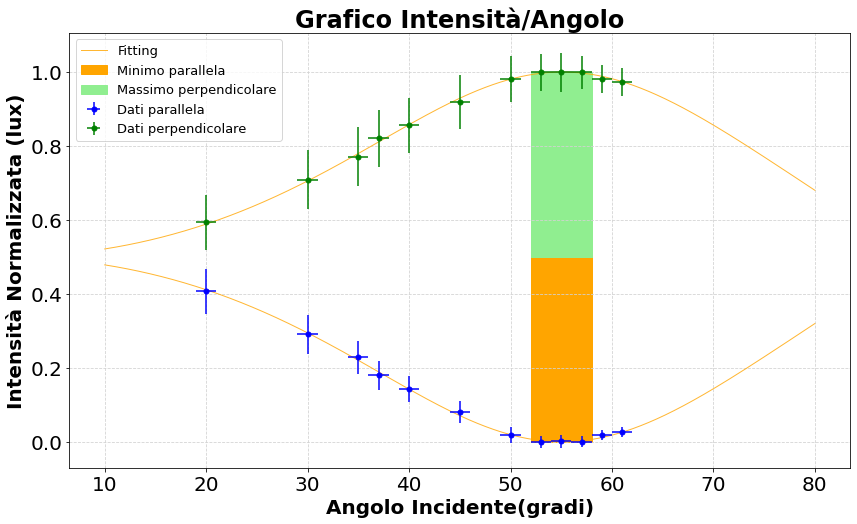

In [33]:
def fittingParallel(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)/((np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)+(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2))
def fittingPerpendicular(thetai, indexrifr):
  return (np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)/((np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)+(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2))


n = 1.27
#simulation
thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2

Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot


min = np.argmin(Isimulated)
max = np.argmax(Isimulated2)

#data
Idata0 = np.array([2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,15.6,11.4])
Idata02 = np.array([97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9,22.75,27.8])
Idataerr = 1.3
Angle0 = 90-np.array([29,40,45,50,53,55,35,37,33,31,70,60])
Idata1 = Idata = Idata0
Idata12 = Idata2 = Idata02
Idatatot = Idata+Idata2

Idatatoterr = Idataerr+Idataerr
Idataerrrel = (Idatatoterr/Idatatot + Idataerr/Idata)
Idataerrrel2 = (Idatatoterr/Idatatot + Idataerr/Idata2)


Idata = Idata/Idatatot
Idataerr = Idataerrrel*Idata
Idata2 = Idata2/Idatatot
Idataerr2 = Idataerrrel2*Idata2

Angleerr = 1

Angle = Angle0/180*np.pi
#print data result
minimum = findMinWithRange(Angle,Idata,0.01)
maximum = findMaxWithRange(Angle,Idata2,0.01)




print('Brewster Angle data range from minimum')
print(Angle[minimum[0]]*180/np.pi)
print(Angle[minimum[1]]*180/np.pi)

print('Brewster Angle Simulated data mean from minimum')
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error from minimum')
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-Angle[minimum[1]]+2*Angleerr)*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from minimum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from minimum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

print('Brewster Angle Simulated from maximum mean')
BrewsterDataAngle = (Angle[maximum[0]]+Angle[maximum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated from maximum error')
BrewsterDataAngleErr = np.abs(Angle[maximum[0]]-Angle[maximum[1]]+2*Angleerr)*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from maximum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from maximum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

#fitting

popt, pcov = scipy.optimize.curve_fit(fittingParallel, Angle, Idata, p0 = np.array([n]))
indexrifr_err = np.sqrt(np.diag(pcov))
indexrifr = popt

#print fitting result
print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Index rifr err graficamente')
print(0.07)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)
print('Brewster err graficamente')
print(1/(1+1.43**2)*0.07*180/np.pi)

x = np.linspace(10*np.pi/180,80*np.pi/180,1000)
x1 = np.arcsin(np.sin(x)/indexrifr)
Idatafit = simulation(x,x1)
Idatafitperpendicular = simulationPerpendicular(x,x1)
y = Idatafit/(Idatafit+Idatafitperpendicular)
yperpendicular = Idatafitperpendicular/(Idatafit+Idatafitperpendicular)

popt, pcov = scipy.optimize.curve_fit(fittingPerpendicular, Angle, Idata2, p0 = np.array([n]))
indexrifr_errPerp = np.sqrt(np.diag(pcov))
indexrifrPerp = popt

#print fitting result
print('Index rifr from fit perpendicular')
print(indexrifrPerp)
print(indexrifr_errPerp)
print('Index rifr err graficamente')
print(0.13)
print('Brewster Angle from fit perpendicular')
print(np.arctan(indexrifrPerp)*180/np.pi)
print(1/(1+indexrifrPerp**2)*indexrifr_errPerp*180/np.pi)
print('Brewster err graficamente')
print(1/(1+1.43**2)*0.13*180/np.pi)

xPerp = np.linspace(10*np.pi/180,80*np.pi/180,1000)
x1Perp = np.arcsin(np.sin(xPerp)/indexrifrPerp)
IdatafitPerp = simulation(xPerp,x1Perp)
IdatafitperpendicularPerp = simulationPerpendicular(xPerp,x1Perp)
yPerp = IdatafitPerp/(IdatafitPerp+IdatafitperpendicularPerp)
yperpendicularPerp = IdatafitperpendicularPerp/(IdatafitPerp+IdatafitperpendicularPerp)

#graph
fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità Normalizzata (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='orange', label='Fitting', linewidth=1, alpha=0.8)
#plt.plot(x*180/np.pi,yperpendicular,color='red', linewidth=5, alpha=0.8)

#plt.plot(xPerp*180/np.pi,yPerp,color='darkred', label='Fitting Perp', linewidth=5, alpha=0.8)
plt.plot(xPerp*180/np.pi,yperpendicularPerp,color='orange', linewidth=1, alpha=0.8)

#plt.plot(thetai*360/np.pi/2,Isimulated, zorder=5, color = "orange", label = "Simul parallela", linewidth=3, alpha=0.8)
#plt.plot(thetai*360/np.pi/2,Isimulated2, zorder=5, color = "lightgreen", label = "Simul perpendicolare", linewidth=3, alpha=0.8)

plt.errorbar(Angle*360/np.pi/2,Idata,xerr=Angleerr,yerr=Idataerr, fmt='o', markersize = 5, zorder=5, color = "blue", label = "Dati parallela")
plt.errorbar(Angle*360/np.pi/2,Idata2,xerr=Angleerr, yerr=Idataerr2,fmt='o', markersize = 5, zorder=5, color = "green", label = "Dati perpendicolare")
#plt.errorbar(thetai*360/np.pi/2,Itot, fmt='o', markersize = 5, zorder=5, color = "red", label = "Simulated set")
#plt.axvspan(Angle[minimum[0]]*180/np.pi,Angle[minimum[1]]*180/np.pi, alpha=0.5,color='orange',label='Minimum')
plt.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi-Angleerr,Angle[minimum[1]]*180/np.pi+Angleerr,100),np.zeros(100),np.ones(100)*0.5,color='orange',label='Minimo parallela')
plt.fill_between(np.linspace(Angle[maximum[0]]*180/np.pi-Angleerr,Angle[maximum[1]]*180/np.pi+Angleerr,100),np.ones(100),np.ones(100)*0.5,color='lightgreen',label='Massimo perpendicolare')
#plt.plot(thetai*360/np.pi/2,Isimulated, color="red",zorder=1, label = "Simulated Curve")
#plt.plot(IFit,xFit, color="orange",zorder=1, label = "Simulated Fit")
plt.legend(loc="upper left",prop={'size': 13})
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)